In [ ]:
# this notebook generates node cell dicts for mem index calculations with defined distance thresholds
# to directly addresss reviewer 3 comments 

# it would be ideal to have a way to parameterize lineage distance for generating a parent-cell dictionary for mem-inference

# pseudo code:
# for node pairs in tree: 
    # compute node distance
        # if node distance == input:
            # collapse cells into group for mem cv calculation



In [29]:

from ete3 import Tree
import itertools

def test_function(in_path_annot, in_path, dist_thresh):
    
    parent_lst = []
    
    tree = Tree(in_path_annot, format = 1)
    #print(tree)
    
    for tn in tree.traverse('postorder'): # here is where you want to modify the dictionary so that cousins are grouped together as well

        if tn.is_leaf():        
            #print(tn.name)
            #leaves.add(tn.name)
            parent = tn.up.name
            #print(parent)
            if parent != "0|0|0|0" or parent != "0|0|0|0|0|0|0|0": # disregard unedited cells
                
                if parent not in parent_lst:
                    
                    parent_lst.append(parent) # add node names to list
                    
                #elif parent in parent_lst:
                    
                #    print("duplicate found!")
                    
    #print(parent_lst)
    parent_lst.remove('0|0|33|0')
    parent_lst.remove('0|0|58|0')
    # get all pairs of lineages
    
    all_combos = list(itertools.combinations(parent_lst, 2))
    #print(all_combos)
    
    # now compute the lineage distance 
    
    for combo in all_combos:
            
            print(combo)
            
            node_1 = combo[0]
            node_2 = combo[1]
            
            topo_dist = tree.get_distance(node_1, node_2, topology_only=True)
            print(topo_dist)
    
test_1 = test_function("/oak/stanford/scg/lab_congle/PRT/MolCell_review_Q12022/10X_sc_analysis/2022Feb_tcourse/6_lin_recon/full_depth/processed_trees/nwh_14/lg_33", 
                       "/oak/stanford/scg/lab_congle/PRT/MolCell_review_Q12022/10X_sc_analysis/2022Feb_tcourse/6_lin_recon/full_depth/nwh_14/lg_33",
                      1)
                



('0|0|12|0', '0|0|68|25')
2.0
('0|0|12|0', '0|0|24|7')
2.0
('0|0|12|0', '0|0|50|0')
5.0
('0|0|12|0', '8|27|0|0')
6.0
('0|0|12|0', '0|0|77|30')
7.0
('0|0|12|0', '0|0|66|23')
7.0
('0|0|12|0', '0|0|69|26')
5.0
('0|0|12|0', '0|0|2|0')
5.0
('0|0|12|0', '0|0|65|22')
5.0
('0|0|12|0', '0|0|21|5')
6.0
('0|0|12|0', '0|39|33|0')
7.0
('0|0|12|0', '0|0|84|0')
5.0
('0|0|12|0', '0|0|83|34')
6.0
('0|0|12|0', '0|0|61|0')
7.0
('0|0|12|0', '0|0|30|0')
7.0
('0|0|12|0', '0|44|58|0')
7.0
('0|0|12|0', '9|28|0|0')
7.0
('0|0|12|0', '0|0|25|8')
7.0
('0|0|12|0', '0|0|31|11')
7.0
('0|0|12|0', '0|0|23|0')


TreeError: 'Ambiguous node name: 0|0|23|0'

{'0|0|68|25': ['ATGGGAGCAACAAAGT-1', 'TCCTTTCAGATTAGCA-1', 'GACTATGGTTGTTGTG-1', 'CTGTGAAAGAGCTGCA-1', 'ACTCCCACAGGGTTGA-1', 'AAGTTCGCAGCAGTAG-1', 'CGAGGAACATGGTACT-1', 'CACTGAAGTTAGCGGA-1', 'GGGACCTAGCCGATAG-1', 'TCACGCTAGGTCATCT-1', 'CACAGGCGTATTGCCA-1', 'GCTCAAAAGCCGTTAT-1', 'AACGGGAGTACTAAGA-1', 'GCCAGGTAGGACAAGA-1', 'TCCTGCACACAATCTG-1', 'AGCGTCGTCACTGGGC-1', 'CATTGTTGTGCCCTTT-1', 'GGCAGTCCAGCTTCCT-1'], '0|0|77|30': ['CAGATCAGTTCAGTAC-1', 'GTTGAACGTGCAGGAT-1', 'GGGAGTAGTTGATCGT-1'], '0|0|69|26': ['TCTACCGGTCAGATTC-1', 'AAACCCAAGATGCTTC-1', 'AAGATAGAGTGATAGT-1', 'GGTTCTCCAGCTATTG-1', 'AGGATAAAGCAGATAT-1', 'TGTTGAGCAGAATTCC-1', 'ACGGGTCAGCCAAGGT-1', 'ACATTTCAGTACGTCT-1', 'GAGTCATTCCTAGAGT-1', 'ATACTTCCATAGAAAC-1', 'CTTCTAAGTAATACCC-1', 'TTCTAGTCATCATCCC-1', 'TACTGCCCAAGTTCGT-1', 'AGACCCGGTCTGCATA-1', 'CCATAAGAGGAACTAT-1', 'AGGCTGCTCGTCGATA-1', 'TTGGGTACATAGAGGC-1', 'CTCCCAATCCTAGCCT-1'], '0|39|33|0': ['CTGAATGGTCTAGTGT-1', 'GCGTGCAGTCCTTAAG-1', 'CCGAACGGTATGTCCA-1', 'CCTCAACAGGCCTTG

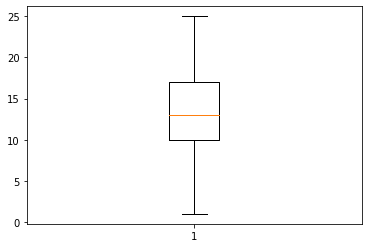

In [81]:
# getting node name ambiguity issue
# perhaps take all pairs of cells or maybe one representative cell within a parent node


from ete3 import Tree
import itertools
from collections import defaultdict
from matplotlib import pyplot as plt

def test_function(in_path_annot, in_path, dist_thresh):
    
    parent_dict = defaultdict(list)
    
    tree = Tree(in_path_annot, format = 1)
    
    for tn in tree.traverse('postorder'): # here is where you want to modify the dictionary so that cousins are grouped together as well

        if tn.is_leaf():        
            #print(tn.name)
            #leaves.add(tn.name)
            parent = tn.up.name
            #print(parent)
            if parent != "0|0|0|0" or parent != "0|0|0|0|0|0|0|0": # disregard unedited cells
                
                parent_dict[parent].append(tn.name)
                    
    #print(parent_dict)
    
    nodes = parent_dict.keys()
    
    all_combos = list(itertools.combinations(nodes, 2))
    #print(all_combos)
    
    dists = []
    
    collapse_dict = defaultdict(list) # list of cells within defined lineage distance
    
    collapse_n = 0 # collapse id
    
    for combo in all_combos:
        
        node_1 = combo[0]
        node_2 = combo[1]
        
        cell_1 = parent_dict.get(node_1)[0]
        #print(node_1)
        cell_2 = parent_dict.get(node_2)[0]
        #print(node_2)
        topo_dist = tree.get_distance(cell_1, cell_2, topology_only=True) - 2 # disregard parent nodes
        #print(topo_dist)
        dists.append(topo_dist)
        
        if topo_dist <= dist_thresh:
            
            collapse_lst = parent_dict.get(node_1) + parent_dict.get(node_2)
            collapse_dict[node_1].append(collapse_lst)
            
        collapse_n += 1
    
    plt.boxplot(dists)
    #print(min(dists))
    
    #print(collapse_dict)
    
    # flatten list of lists
    
    out_dict = {}
    
    for node, llst in collapse_dict.items():
        
        flat_list = [item for sublist in llst for item in sublist]
        uniq_list = list(set(flat_list))
        out_dict[node] = uniq_list
    
    print(out_dict)
    
    return parent_dict, out_dict
    
test_1 = test_function("/oak/stanford/scg/lab_congle/PRT/MolCell_review_Q12022/10X_sc_analysis/2022Feb_tcourse/6_lin_recon/full_depth/processed_trees/nwh_14/lg_33", 
                       "/oak/stanford/scg/lab_congle/PRT/MolCell_review_Q12022/10X_sc_analysis/2022Feb_tcourse/6_lin_recon/full_depth/nwh_14/lg_33",
                      1)
                



In [82]:

tot_cells = 0
for node_id, cell_lst in test_1[0].items():
    
    #print(node_id)
    #print(len(cell_lst))
    
    tot_cells += len(cell_lst)
    
print(tot_cells)


tot_cells_2 = 0
for node_id, cell_lst in test_1[1].items():
    
    print(node_id)
    print(len(cell_lst))
    
    tot_cells_2 += len(cell_lst)
    
print(tot_cells_2)

1626
0|0|68|25
18
0|0|77|30
3
0|0|69|26
18
0|39|33|0
103
0|0|61|0
9
0|44|58|0
7
9|28|0|0
21
0|0|23|0
8
0|0|63|21
16
0|0|45|0
49
19|42|76|0
26
10|29|16|0
172
22|47|79|31
3
0|24|22|6
8
0|49|22|6
60
0|0|67|24
11
21|46|53|17
8
0|32|9|0
59
0|15|43|0
40
0|33|9|0
4
0|16|47|0
8
0|19|10|0
104
0|43|5|2
60
0|19|5|2
14
0|0|27|9
21
16|19|27|9
20
0|6|59|19
6
0|6|72|0
3
0|25|18|4
10
17|40|18|4
3
0|11|18|4
11
0|11|7|0
13
0|17|7|0
16
0|18|20|0
2
0|3|20|0
83
0|0|51|15
9
0|37|8|0
65
12|31|34|0
19
6|22|6|0
22
0|0|41|14
19
14|3|71|28
9
0|3|55|18
4
0|34|62|20
4
0|0|36|12
28
0|0|73|0
5
0|0|82|0
2
0|50|13|0
60
0|45|52|16
4
0|0|38|13
15
0|0|81|0
2
1284


In [ ]:
# write dictionary to file to read into mem index calculations

